In [1]:
library(ggplot2)
library(reshape2)
library(xlsx)
library(IRdisplay)
library("mapproj") # Converts latitude/longitude into projected coordinates
library("rworldmap") # get world map with iso codes
library(dplyr)
library(RColorBrewer)
library(Cairo)
require(scales)
library(stringr)
library(tidyverse)

Loading required package: rJava
Loading required package: xlsxjars
Loading required package: maps
Loading required package: sp
### Welcome to rworldmap ###
For a short introduction type : 	 vignette('rworldmap')

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: scales
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  1.4.2     ✔ readr   1.1.1
✔ tidyr   0.8.0     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::col_factor() masks scales::col_factor()
✖ purrr::discard()    masks scales::discard()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()
✖ purrr::map()        masks maps::map()


In [2]:
set.seed(27042012)

In [3]:
COI=c(2,3,7)

In [4]:
d=read.csv("Network.Clusters.nodes.csv")
row.names(d)=d$name
d$id=gsub("^.+(WW-\\d+)$","\\1",d$name)
head(d)

,SUID,X__glayCluster,Acession.number,Altitude,any.other.important.information,any.other.important.information.1,any.other.important.information.2,AverageShortestPathLength,Awn.Colour,Awn.Type,⋯,TaxonCluster,Taxonomy,Taxonomy1,Taxonomy2,TopologicalCoefficient,Variety.Genotype,Wax,wordcloud.sync,Year.listed...recommended...Acquisition.year...released...collected,id
Aegilops_tauschii.WW-246,586,1,IG 46803,NA,,,SSD,3.061728,,,⋯,,Aegilops,tauschii Coss.,subsp. Tauschii,0.5000000,,,false,1979,WW-246
Aegilops_tauschii.WW-247,585,1,IG 48508,NA,,,SSD,4.059671,,,⋯,,Aegilops,tauschii Coss.,subsp. tauschii,0.0000000,,,false,na,WW-247
Aegilops_tauschii.WW-248,584,2,AE 525,NA,,,SSD,2.067901,,,⋯,,Aegilops,tauschii Coss.,subsp. strangulata (Eig) Tzvel.,0.4719239,,,false,na,WW-248
Aegilops_speltoides.WW-272,583,2,Spel-332/1,NA,,,SSD,2.965021,,,⋯,,Aegilops,speltoides Tausch,subsp. speltoides,0.5500000,,,false,na,WW-272
Aegilops_speltoides.WW-274,582,2,SPE 351-2-1,NA,,,SSD,2.133745,,,⋯,,Aegilops,speltoides Tausch,subsp. speltoides,0.1738985,,,false,na,WW-274
Triticum_aestivum.WW-001,581,3,,NA,,,,2.051440,,,⋯,T. aestivum γ,Triticum,aestivum,,0.3598679,LEEDS,,false,na,WW-001


In [5]:
co=read.delim("../curate.codes.txt",sep="\t",na.string="")
d=merge(d,co,by=c("id","continent","Country.of.origin"))
row.names(d)=d$name
nrow(d)
head(d)

[1] 487

,id,continent,Country.of.origin,SUID,X__glayCluster,Acession.number,Altitude,any.other.important.information,any.other.important.information.1,any.other.important.information.2,⋯,TaxonCluster,Taxonomy,Taxonomy1,Taxonomy2,TopologicalCoefficient,Variety.Genotype,Wax,wordcloud.sync,Year.listed...recommended...Acquisition.year...released...collected,code
Triticum_aestivum.WW-001,WW-001,Europe,France,581,3,,NA,,,,⋯,T. aestivum γ,Triticum,aestivum,,0.3598679,LEEDS,,false,na,FRA
Triticum_aestivum.WW-002,WW-002,Europe,France,127,3,,NA,,,,⋯,T. aestivum γ,Triticum,aestivum,,0.3722096,STADIUM,,false,na,FRA
Triticum_aestivum.WW-003,WW-003,Europe,France,208,3,,NA,,,,⋯,T. aestivum γ,Triticum,aestivum,,0.3640152,CALISOL,,false,na,FRA
Triticum_aestivum.WW-004,WW-004,Europe,France,143,3,,NA,,,,⋯,T. aestivum γ,Triticum,aestivum,,0.3446401,ZEPHYR,,false,na,FRA
Triticum_aestivum.WW-005,WW-005,Europe,France,139,3,,NA,,,,⋯,T. aestivum γ,Triticum,aestivum,,0.3202182,FORZOR,,false,na,FRA
Triticum_aestivum.WW-006,WW-006,Europe,France,170,3,,NA,,,,⋯,T. aestivum γ,Triticum,aestivum,,0.4064688,TOSKANI,,false,na,FRA


In [6]:
d$TaxonCluster=ifelse(d$TaxonCluster=="",as.character(d$taxon),as.character(d$TaxonCluster))

In [7]:
table(d$TaxonCluster)


               Aegilops_speltoides                  Aegilops_tauschii 
                                 2                                  3 
                     T. aestivum α                      T. aestivum β 
                               240                                 41 
                     T. aestivum γ                Triticum_araraticum 
                               147                                 11 
                Triticum_boeoticum               Triticum_dicoccoides 
                                 2                                  6 
                 Triticum_dicoccon                     Triticum_durum 
                                 7                                 10 
Triticum_durum_x_Aegilops_tauschii                Triticum_monococcum 
                                 3                                  3 
                   Triticum_spelta             Triticum_sphaerococcum 
                                 2                                  1 
     

In [8]:
write.table(d[,c("id","name","taxon","X__glayCluster","TaxonCluster","code")],row.names=FALSE,sep=",",quote=FALSE,file="PhylogeneticClusters.csv")

In [9]:
D=droplevels(subset(d,X__glayCluster %in% COI & taxon =="Triticum_aestivum"))
nrow(D)
table(D$TaxonCluster)

[1] 428


T. aestivum α T. aestivum β T. aestivum γ 
          240            41           147 

In [10]:
table(D$TaxonCluster,D$code)

               
                AFG ALB ARG ARM AUS AUT AZE BEL BGR BRA CAN CHE CHN COL CZE DEU
  T. aestivum α   6   2   2   2   2   3   4   0   3   2   5   2   9   1   1   6
  T. aestivum β   0   0   0   1   0   0   0   2   3   0   0   2   0   0   2   3
  T. aestivum γ   0   0   0   0   1   3   0   1   0   0   0   2   2   0   4  37
               
                DNK DZA EGY ESP ETH FIN FRA GBR GEO GRC HRV HUN IND IRN ISR ITA
  T. aestivum α   0   3   2  10   1   4   5   4   1   6   0   7   7   2  12   7
  T. aestivum β   0   0   0   0   0   1   0   1   0   0   1   7   0   0   0   0
  T. aestivum γ   4   0   0   0   0   1  44  18   0   0   0   0   0   0   0   4
               
                JPN KEN KOR LBN LVA MAR MEX NER NLD NPL NZL PAK POL PRK PRT ROU
  T. aestivum α   7   2   2   2   0   2   5   1   2   6   3   7   1   1  15   3
  T. aestivum β   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2   0
  T. aestivum γ   0   0   0   0   1   0   0   0   4   0   0   0   8   0 

In [11]:
subset(D,TaxonCluster=="T. aestivum β" & code =="USA")

,id,continent,Country.of.origin,SUID,X__glayCluster,Acession.number,Altitude,any.other.important.information,any.other.important.information.1,any.other.important.information.2,⋯,TaxonCluster,Taxonomy,Taxonomy1,Taxonomy2,TopologicalCoefficient,Variety.Genotype,Wax,wordcloud.sync,Year.listed...recommended...Acquisition.year...released...collected,code
Triticum_aestivum.WW-080,WW-080,America,USA,482,7,TRI 7970,NA,,,SSD,⋯,T. aestivum β,Triticum,aestivum,var. graecum,0.4326907,Warrior,,false,1966,USA
Triticum_aestivum.WW-298,WW-298,America,USA,412,7,4838,NA,,,,⋯,T. aestivum β,Triticum,aestivum,,0.3995521,MINTURK,,false,1919,USA


T. aestivum var. graecum Warrior goes back to a Russion cultivar https://npgsweb.ars-grin.gov/gringlobal/taxonomydetail.aspx?id=40546

https://www.researchgate.net/publication/303627899_The_history_of_wheat_breeding_in_Southern_Kazakhstan

The History of Wheat Breeding in Southern Kazakhstan
Aigul Abugaliyeva and Alexey Morgounov

....
Vavilov (1937) analyzing the potential for wheat improvement in Central Asia
emphasized that selection from the landraces has not exhausted it yet. This method
was successfully used in early breeding and many varieties were developed.
However, extreme diversity of environments in Kazakhstan required introduction
of varieties from outside to meet the production demand in the 1930s (Orlov,
1935). Wheat breeding in Kazakhstan started in 1909 by establishing Red Fall
experimental field (presently Red Fall State Experimental Station) in Chimkent
region (Udolskaya, Kolusheva, 1970). Wheat Breeder A. Golbek started to work
at the station in 1923 focusing on developing varieties for low rainfall areas of
Kazakhstan and Central Asia. Varieties Graecum 283 and Graecum 289 were
selected from a landrace grown in Karshi county of Kashkadarya region and
released in 1929. These were early maturing drought and heat tolerant varieties
with white good quality grain widely cultivated in rainfed areas of Kazakhstan
and Uzbekistan and possibly still maintained in some remote areas. Selection from
a population from Katta-Kurgan county of Samarkand region in 1925 resulted
in development of variety Psevdoturtsikum 2115 which was released in 1938 and
reached the area of 100,000 ha in the 1940s. Similarly, Golbek selected varieties
Graecum 433 released in 1938 and Alborubrum 22308 released in 1950. His most
popular variety was Krasnaya Zvezda (Red Star) selected from local population
near the station and released in 1957. Crossing program at Red Fall Station started
in 1947 with the objective of combination of high yield with disease resistance.
By that time importance of rust was realized especially in years with mild winter,
frequent rain and cool early spring. In the early 1950s Golbek established sites
for multilocational trials covering the environments diversity from high rainfall
(Karabu site) to semi-arid (Karaspan site). Wheat-rye crosses started in 1957 and
variety Krasnovodopadskaya 10 was submitted for official testing in 1965. The
crossing program which started in late 1950s by A. Marko targeted wheat varieties
with superior bread making quality. Several highly successful varieties Krasnovodopadskaya
210, 17, Zhana Zhuldyz, Kazakhstan 50 and Kzyl Dan were developed.
...

In [12]:
Q=droplevels(subset(D,group %in% c("I","II","III","IV")))# &! name %in% row.names(subset(D,TaxonCluster=="T. aestivum β" & code =="USA")) ))
#CO=as.data.frame(prop.table(table(paste(Q$TaxonCluster),Q$code),1))
CO=as.data.frame(prop.table(table(paste(Q$TaxonCluster,Q$group,sep=":"),Q$code),1))
names(CO)=c("TaxonCluster","code","Freq")
subset(CO,code %in% c("USA","RUS"))
CO=do.call(rbind.data.frame,lapply(levels(CO$code),function(co) {
    q=subset(CO,code==co)
    q[which.max(q$Freq),]
}))
head(CO)

,TaxonCluster,code,Freq
577,T. aestivum α:I,RUS,0.04545455
578,T. aestivum α:II,RUS,0.05357143
579,T. aestivum α:III,RUS,0.01428571
580,T. aestivum α:IV,RUS,0.00000000
581,T. aestivum β:I,RUS,0.00000000
582,T. aestivum β:II,RUS,0.11111111
583,T. aestivum β:III,RUS,0.30769231
584,T. aestivum β:IV,RUS,0.00000000
585,T. aestivum γ:I,RUS,0.00000000
586,T. aestivum γ:II,RUS,0.00000000


,TaxonCluster,code,Freq
1,T. aestivum α:I,AFG,0.05681818
14,T. aestivum α:II,ALB,0.01785714
27,T. aestivum α:III,ARG,0.02857143
41,T. aestivum β:I,ARM,0.11111111
57,T. aestivum γ:I,AUS,0.11111111
69,T. aestivum γ:I,AUT,0.11111111


In [13]:
cluster_map= joinCountryData2Map(CO, joinCode = "ISO3", nameJoinColumn = "code")

61 codes from your data successfully matched countries in the map
0 codes from your data failed to match with a country code in the map
182 codes from the map weren't represented in your data


In [14]:
cluster_map_poly=fortify(cluster_map)
cluster_map_poly <- merge(cluster_map_poly, cluster_map@data, by.x="id", by.y="ADMIN", all.x=T)
cluster_map_poly <- cluster_map_poly %>% arrange(id, order)

Regions defined for each Polygons


In [15]:
table(cluster_map_poly$TaxonCluster)
col=c(rev(c("gold4","gold","khaki1","lemonchiffon")),brewer.pal(4,"Reds"),brewer.pal(4,"PuBu"))
#col=c("gold","firebrick","dodgerblue4")


  T. aestivum α:I  T. aestivum α:II T. aestivum α:III  T. aestivum α:IV 
              770              1306               664               111 
  T. aestivum β:I  T. aestivum β:II T. aestivum β:III  T. aestivum β:IV 
              556                93               714               129 
  T. aestivum γ:I  T. aestivum γ:II T. aestivum γ:III  T. aestivum γ:IV 
              278                80               448               111 

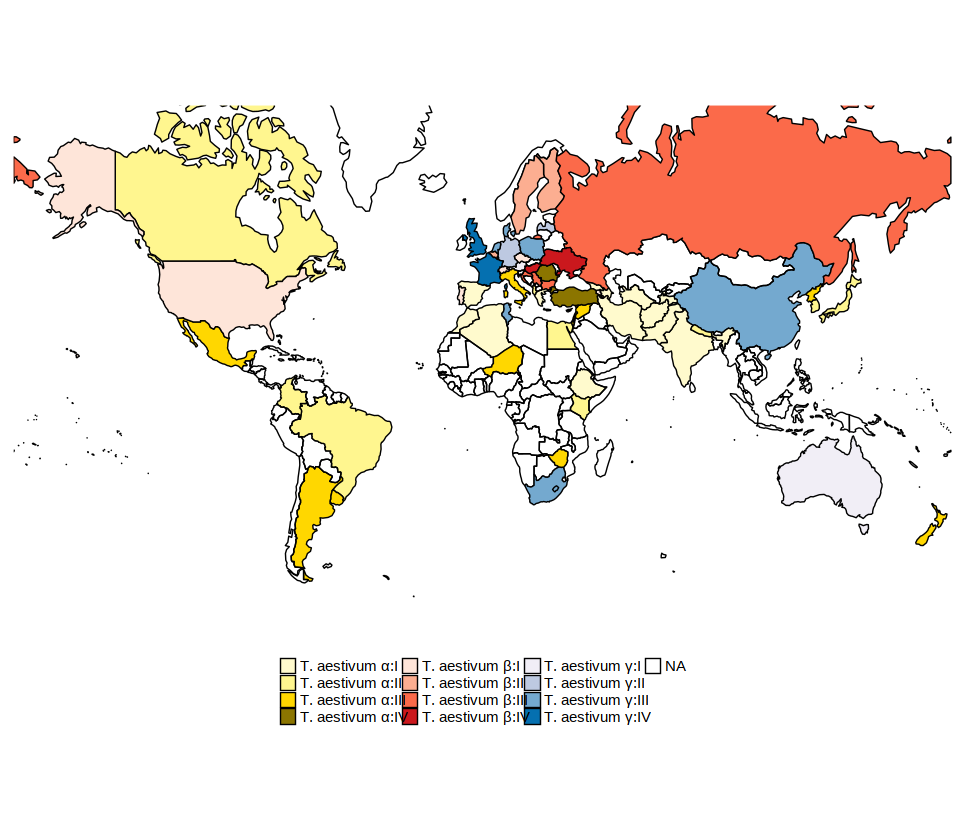

In [16]:
options(repr.plot.width=8, repr.plot.height=7)
ggplot() +
  coord_map(xlim = c(-180, 180), ylim = c(-60, 75))  +
  geom_polygon(data = cluster_map_poly, aes(long, lat, group = group,
               fill=TaxonCluster),colour="black",size = 0.3) +
  scale_fill_manual(values=col) +
  theme_bw() + xlab(NULL) + ylab(NULL) +
  guides(fill = guide_legend(
    title="",
    keywidth = 0.7, keyheight = 0.7,nrow=4,
    reverse=F, title.position="top")) +
  theme(
    plot.background = element_blank()
   ,panel.grid.major = element_blank()
   ,panel.grid.minor = element_blank()
   ,panel.border = element_blank()
   ,axis.ticks = element_blank()
   ,axis.text.x = element_blank()
   ,axis.text.y = element_blank()
   ,legend.position = "bottom"
   ,legend.direction = "horizontal"
  )

In [17]:
Q=droplevels(subset(D,group %in% c("I","II","III","IV")))
X=table(Q$TaxonCluster,Q$group,Q$code)
CO=as.data.frame(prop.table(X,3))
names(CO)=c("TaxonCluster","time_period","code","Freq")

head(CO)

TaxonCluster,time_period,code,Freq
T. aestivum α,I,AFG,0.8333333
T. aestivum β,I,AFG,0.0000000
T. aestivum γ,I,AFG,0.0000000
T. aestivum α,II,AFG,0.0000000
T. aestivum β,II,AFG,0.0000000
T. aestivum γ,II,AFG,0.0000000


In [18]:
periods=list(I="<=1935",II="1936 to 1965", III="1966 to 1985",IV=">=1986")

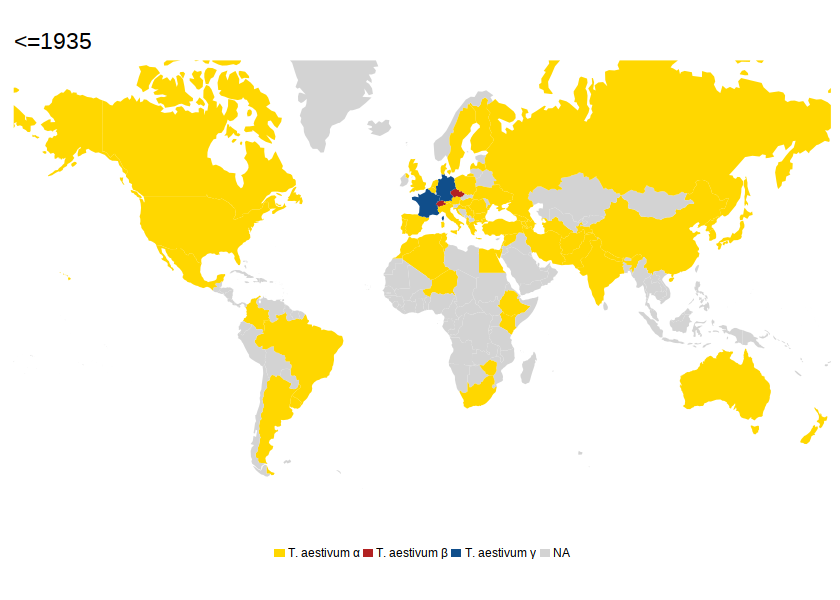

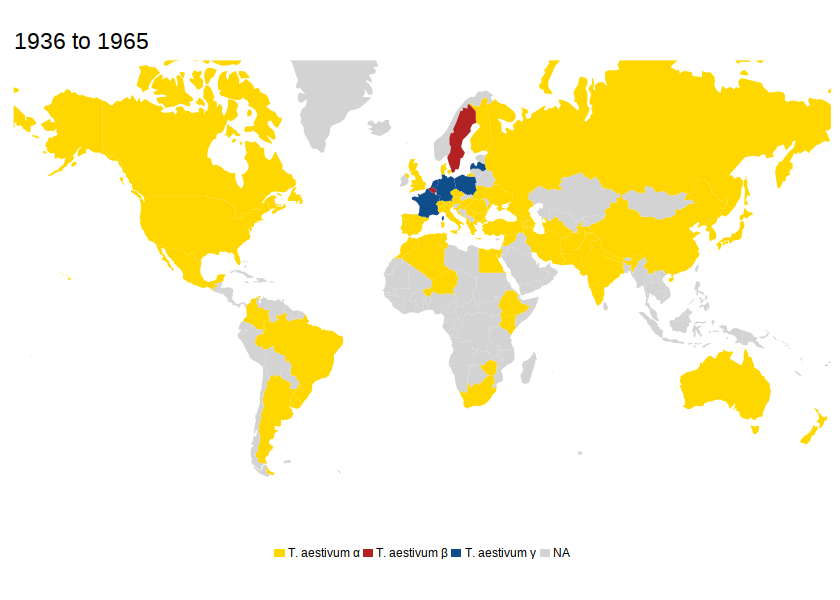

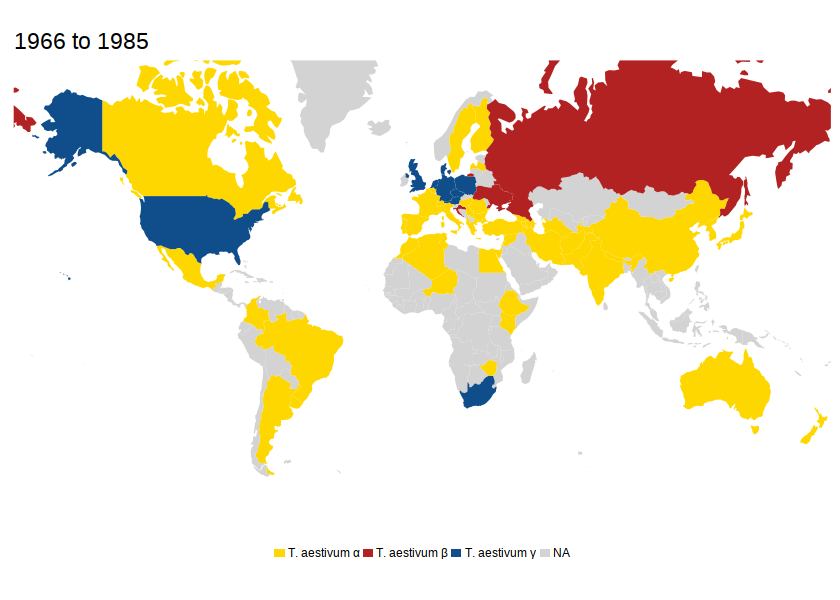

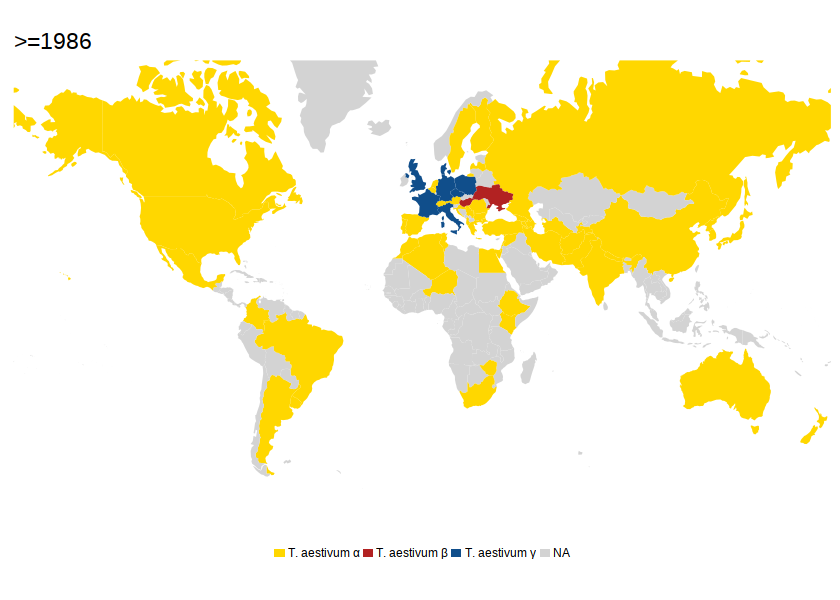

In [19]:
options(repr.plot.width=7, repr.plot.height=5)

for (T in sort(levels(CO$time_period))) {
    CCO=subset(CO,time_period==T)
    CCO=do.call(rbind.data.frame,lapply(levels(CCO$code),function(co) {
        q=subset(CCO,code==co)
        q[which.max(q$Freq),]
    }))
    sink("/dev/null")
    cluster_map= suppressMessages(joinCountryData2Map(CCO, joinCode = "ISO3", nameJoinColumn = "code",verbose=FALSE))
    cluster_map_poly=suppressMessages( fortify(cluster_map))
    cluster_map_poly <- merge(cluster_map_poly, cluster_map@data, by.x="id", by.y="ADMIN", all.x=TRUE)
    cluster_map_poly <- cluster_map_poly %>% arrange(id, order)
    sink()
    col=c("gold","firebrick","dodgerblue4")
    
    g=ggplot() +
      coord_map(xlim = c(-180, 180), ylim = c(-60, 75))  +
      geom_polygon(data = cluster_map_poly, aes(long, lat, group = group,
                   fill=TaxonCluster),size = 0.1) +
      scale_fill_manual(values=col,na.value="lightgrey") +
      theme_bw() + xlab(NULL) + ylab(NULL) +
      guides(fill = guide_legend(
        title="",
        keywidth = 0.4, keyheight = 0.2,
          nrow=1,
        reverse=F, title.position="top")) +
      theme(
        plot.background = element_blank()
       ,panel.grid.major = element_blank()
       ,panel.grid.minor = element_blank()
       ,panel.border = element_blank()
       ,axis.ticks = element_blank()
       ,axis.text.x = element_blank()
       ,axis.text.y = element_blank()
       ,legend.position = "bottom"
       ,legend.direction = "horizontal"
       ,legend.text = element_text(size = 7, hjust = 0, vjust = 1)
      ) +
    ggtitle(periods[[T]])
    display(g)
    Cairo(type='pdf', file=sprintf("worldmap.%s.pdf",T), width=12,height=6, units='in', bg='transparent')
    print(g)
    dev.off()
}

## Time period

In [20]:
table(D$TaxonCluster,D$group)

               
                    I II III IV
  T. aestivum α  6 88 56  72 18
  T. aestivum β  0  9 10  13  9
  T. aestivum γ  6  9 23  34 75

In [21]:
Q=droplevels(subset(D, ! is.na(D$group) & ! group==""))
X=table(Q$TaxonCluster,Q$group)
round(prop.table(X,1)*100,1)
chisq.test(X)
GROUP=do.call(rbind,lapply(1:nrow(X), function(i) {
    n=row.names(X)[i]
    q=chisq.test(X[n,],p=colSums(X[-i,])/sum(X[-i,]))
    q=data.frame(cluster=n,t(data.frame(X[i,])), t(data.frame(q$expected)), 
                 X.squared=q$statistic, df=q$parameter,p.value=q$p.value,significant=q$p.value<0.01)
    names(q)[6:9]=paste(names(q)[2:5],"expected",sep=".")
    row.names(q)=NULL
    q
}))
GROUP2=do.call(cbind.data.frame,lapply(2:5,function(i) {
    factor(ifelse(GROUP$significant,
                  ifelse(GROUP[,i]> GROUP[,i+4],
                         "enriched",ifelse(GROUP[,i]< GROUP[,i+4],
                                           "depleted","nonsense")),"p>=0.01"),
           levels=c("p>=0.01","enriched","depleted","nonsense"))
}))
GROUP2=data.frame(cluster=GROUP$cluster,GROUP2)
names(GROUP2)[2:5]=paste(names(GROUP)[2:5],"direction",sep=".")
GROUP
GROUP2

               
                   I   II  III   IV
  T. aestivum α 37.6 23.9 30.8  7.7
  T. aestivum β 22.0 24.4 31.7 22.0
  T. aestivum γ  6.4 16.3 24.1 53.2


	Pearson's Chi-squared test

data:  X
X-squared = 112.39, df = 6, p-value < 2.2e-16


cluster,I,II,III,IV,I.expected,II.expected,III.expected,IV.expected,X.squared,df,p.value,significant
T. aestivum α,88,56,72,18,23.14286,42.428571,60.42857,108.00000,263.316976,3,8.615187e-57,TRUE
T. aestivum β,9,10,13,9,10.60533,8.637333,11.58933,10.16800,0.763857,3,8.580910e-01,FALSE
T. aestivum γ,9,23,34,75,49.73455,33.840000,43.58182,13.84364,309.109734,3,1.061864e-66,TRUE


cluster,I.direction,II.direction,III.direction,IV.direction
T. aestivum α,enriched,enriched,enriched,depleted
T. aestivum β,p>=0.01,p>=0.01,p>=0.01,p>=0.01
T. aestivum γ,depleted,depleted,depleted,enriched


png 
  2

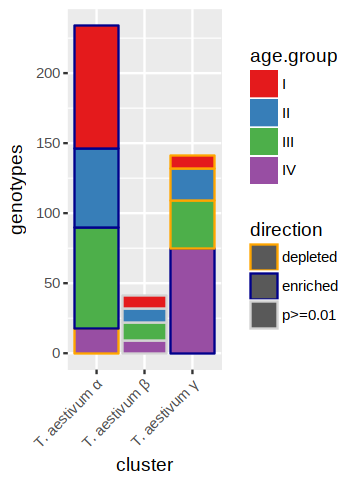

In [22]:
GROUP.t=melt(GROUP[,-c(6:12)],id.vars=c("cluster","significant"),value.name="genotypes",variable.name="age.group")
GROUP2.t=melt(GROUP2,id.vars=c("cluster"),value.name="direction",variable.name="age.group")
GROUP2.t$age.group=factor(gsub("\\.direction","",GROUP2.t$age.group))
GROUP.t=merge(GROUP.t,GROUP2.t,by=c("cluster","age.group"))
mat=list("p>=0.01"="lightgrey","enriched"="darkblue","depleted"="orange","nonsense"="green")
GROUP.t$direction=factor(GROUP.t$direction)
col=unlist(mat[levels(droplevels(GROUP.t$direction))])
options(repr.plot.width=3, repr.plot.height=4)
g=ggplot(GROUP.t,aes(x=cluster,y=genotypes,fill=age.group,colour=direction)) + 
    scale_colour_manual(values=col)+
    geom_bar(stat="identity", position=position_stack()) + 
    theme(axis.text.x = element_text(angle = 45, hjust = 1))+
    scale_fill_brewer(palette="Set1")
Cairo(type='pdf', file="test.TaxonCluster.time_period.flipped.pdf", width=3,height=4, units='in', bg='transparent')
print(g)
dev.off()

png 
  2

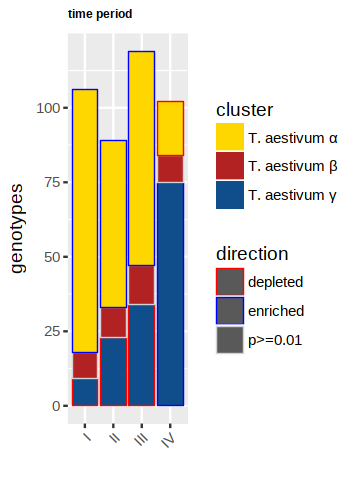

In [24]:
GROUP.t=melt(GROUP[,-c(6:12)],id.vars=c("cluster","significant"),value.name="genotypes",variable.name="age.group")
GROUP2.t=melt(GROUP2,id.vars=c("cluster"),value.name="direction",variable.name="age.group")
GROUP2.t$age.group=factor(gsub("\\.direction","",GROUP2.t$age.group))
GROUP.t=merge(GROUP.t,GROUP2.t,by=c("cluster","age.group"))
mat=list("p>=0.01"="lightgrey","enriched"="blue","depleted"="red","nonsense"="green")
GROUP.t$direction=factor(GROUP.t$direction)
col=unlist(mat[levels(droplevels(GROUP.t$direction))])
options(repr.plot.width=3, repr.plot.height=4)
g=ggplot(GROUP.t,aes(x=age.group,y=genotypes,fill=cluster,colour=direction)) + 
    scale_colour_manual(values=col)+
    geom_bar(stat="identity", position=position_stack(),size=.3) + 
    ggtitle("time period") +
    xlab("")+
    theme(axis.text.x = element_text(angle = 45, hjust = 1),plot.title = element_text(size = 7, face = "bold"))+     scale_fill_manual(values=c("gold","firebrick","dodgerblue4"))
Cairo(type='pdf', file="test.TaxonCluster.time_period.pdf", width=3,height=4, units='in', bg='transparent')
print(g)
dev.off()

## Biological status or type of accession

png 
  2

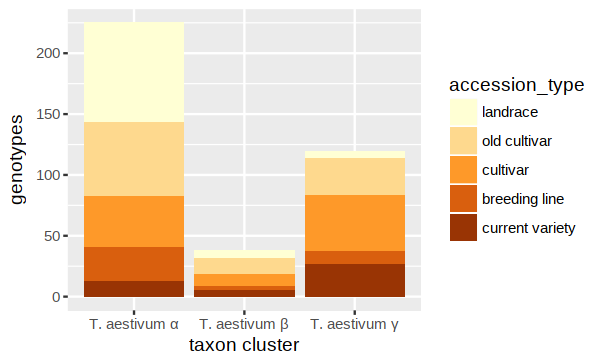

In [25]:
options(repr.plot.width=5, repr.plot.height=3)

QQ=droplevels(subset(D,group %in% c("I","II","III","IV") & !Biological.status =="na" & !Biological.status =="" & ! is.na(Biological.status)))
X=table(QQ$Biological.status)
QQ=droplevels(subset(QQ, Biological.status %in% names(X[X>10])))
QQ$accession_type=ordered(QQ$Biological.status,levels=c("landrace","old cultivar","cultivar","breeding line","current variety"))

g=ggplot(QQ,aes(x=TaxonCluster,fill=accession_type)) + 
    geom_bar(position = "stack")+
    xlab("taxon cluster") +
    ylab("genotypes") +
    scale_fill_brewer(palette="YlOrBr")

Cairo(type='pdf', file="TaxonCluster.accession_type.pdf", width=5,height=3, units='in', bg='transparent')
print(g)
dev.off()

               
                landrace old cultivar cultivar breeding line current variety
  T. aestivum α       81           61       42            28              13
  T. aestivum β        6           13       10             3               6
  T. aestivum γ        5           30       46            11              27

Warning message in chisq.test(XX):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  XX
X-squared = 66.944, df = 8, p-value = 1.989e-11


png 
  2

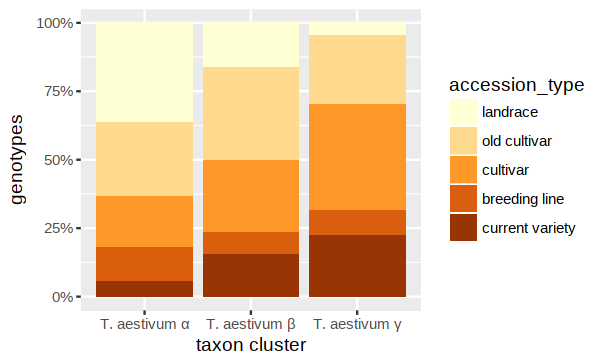

In [26]:
XX=table(QQ$TaxonCluster,QQ$accession_type)
XX
chisq.test(XX)
QQQ=as.data.frame(prop.table(XX,1))
names(QQQ)=c("TaxonCluster","accession_type","ratio")

g=ggplot(QQQ,aes(x=TaxonCluster,y=ratio,fill=accession_type)) + 
    geom_bar(position = "stack",stat="identity")+
    scale_y_continuous(labels=percent)+
    xlab("taxon cluster") +
    ylab("genotypes") +
    scale_fill_brewer(palette="YlOrBr")

Cairo(type='pdf', file="TaxonCluster.accession_type.percent.pdf", width=5,height=3, units='in', bg='transparent')
print(g)
dev.off()

In [27]:
target="accession_type"
X=table(QQ$TaxonCluster,QQ[,target])
round(prop.table(X,1)*100,1)
suppressWarnings(chisq.test(X))
GROUP=do.call(rbind,lapply(1:nrow(X), function(i) {
    n=row.names(X)[i]
    q=suppressWarnings(chisq.test(X[n,],p=colSums(X[-i,])/sum(X[-i,])))
    q=data.frame(cluster=n,t(data.frame(X[i,])), t(data.frame(q$expected)), 
                 X.squared=q$statistic, df=q$parameter,p.value=q$p.value,significant=q$p.value<0.01)
    names(q)[7:11]=paste(names(q)[2:6],"expected",sep=".")
    row.names(q)=NULL
    q
}))
GROUP2=do.call(cbind.data.frame,lapply(2:6,function(i) {
    factor(ifelse(GROUP$significant,
                  ifelse(GROUP[,i]> GROUP[,i+5],
                         "enriched",ifelse(GROUP[,i]< GROUP[,i+5],
                                           "depleted","nonsense")),"p>=0.01"),
           levels=c("p>=0.01","enriched","depleted","nonsense"))
}))
GROUP2=data.frame(cluster=GROUP$cluster,GROUP2)

names(GROUP2)[2:6]=paste(names(GROUP)[2:6],"direction",sep=".")
GROUP
GROUP2

               
                landrace old cultivar cultivar breeding line current variety
  T. aestivum α     36.0         27.1     18.7          12.4             5.8
  T. aestivum β     15.8         34.2     26.3           7.9            15.8
  T. aestivum γ      4.2         25.2     38.7           9.2            22.7


	Pearson's Chi-squared test

data:  X
X-squared = 66.944, df = 8, p-value = 1.989e-11


cluster,landrace,old.cultivar,cultivar,breeding.line,current.variety,landrace.expected,old.cultivar.expected,cultivar.expected,breeding.line.expected,current.variety.expected,X.squared,df,p.value,significant
T. aestivum α,81,61,42,28,13,15.76433,61.62420,80.25478,20.06369,47.292994,316.203870,4,3.458419e-67,TRUE
T. aestivum β,6,13,10,3,6,9.50000,10.05233,9.72093,4.30814,4.418605,3.125022,4,5.371255e-01,FALSE
T. aestivum γ,5,30,46,11,27,39.36502,33.48289,23.52852,14.02662,8.596958,91.871793,4,5.269855e-19,TRUE


cluster,landrace.direction,old.cultivar.direction,cultivar.direction,breeding.line.direction,current.variety.direction
T. aestivum α,enriched,depleted,depleted,enriched,depleted
T. aestivum β,p>=0.01,p>=0.01,p>=0.01,p>=0.01,p>=0.01
T. aestivum γ,depleted,depleted,enriched,depleted,enriched


png 
  2

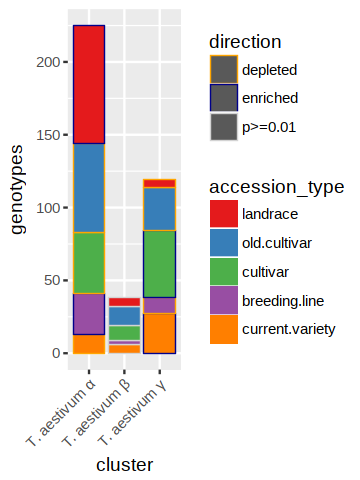

In [28]:
GROUP.t=melt(GROUP[,-c(7:14)],id.vars=c("cluster","significant"),value.name="genotypes",variable.name=target)
GROUP2.t=melt(GROUP2,id.vars=c("cluster"),value.name="direction",variable.name=target)
GROUP2.t[,target]=factor(gsub("\\.direction","",GROUP2.t[,target]))
GROUP.t=merge(GROUP.t,GROUP2.t,by=c("cluster",target))
mat=list("p>=0.01"="lightgrey","enriched"="darkblue","depleted"="orange","nonsense"="green")
GROUP.t$direction=factor(GROUP.t$direction)
col=unlist(mat[levels(droplevels(GROUP.t$direction))])
options(repr.plot.width=3, repr.plot.height=4)
g=ggplot(GROUP.t,aes_string(x="cluster",y="genotypes",fill=target,colour="direction")) + 
    scale_colour_manual(values=col)+
    geom_bar(stat="identity", position=position_stack(),size=.3) + 
    theme(axis.text.x = element_text(angle = 45, hjust = 1))+ 
    scale_fill_brewer(palette="Set1")
Cairo(type='pdf', file="test.TaxonCluster.accession_type.flipped.pdf", width=3,height=4, units='in', bg='transparent')
print(g)
dev.off()

png 
  2

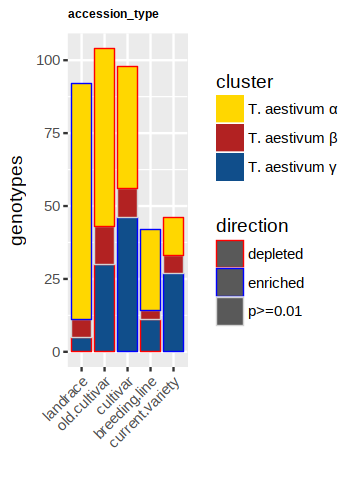

In [29]:
GROUP.t=melt(GROUP[,-c(7:14)],id.vars=c("cluster","significant"),value.name="genotypes",variable.name=target)
GROUP2.t=melt(GROUP2,id.vars=c("cluster"),value.name="direction",variable.name=target)
GROUP2.t[,target]=factor(gsub("\\.direction","",GROUP2.t[,target]))
GROUP.t=merge(GROUP.t,GROUP2.t,by=c("cluster",target))
mat=list("p>=0.01"="lightgrey","enriched"="blue","depleted"="red","nonsense"="green")
GROUP.t$direction=factor(GROUP.t$direction)
col=unlist(mat[levels(droplevels(GROUP.t$direction))])
options(repr.plot.width=3, repr.plot.height=4)
g=ggplot(GROUP.t,aes_string(x=target,y="genotypes",fill="cluster",colour="direction")) + 
    scale_colour_manual(values=col)+
    geom_bar(stat="identity", position=position_stack(),size=.3) + 
    ggtitle(gsub("\\."," ",target)) +
    xlab("")+
    theme(axis.text.x = element_text(angle = 45, hjust = 1),plot.title = element_text(size = 7, face = "bold"))+ 
    scale_fill_manual(values=c("gold","firebrick","dodgerblue4"))
Cairo(type='pdf', file="test.TaxonCluster.accession_type.pdf", width=3,height=4, units='in', bg='transparent')
print(g)
dev.off()

In [30]:
table(D$TaxonCluster,D$Biological.status)

               
                breeding line cultivar current variety landrace na old cultivar
  T. aestivum α            28       42              13       81 11           61
  T. aestivum β             3       10               6        6  2           13
  T. aestivum γ            11       46              27        5 28           30
               
                old variety parental material parental material, not a cultivar
  T. aestivum α           3                 1                                 0
  T. aestivum β           0                 0                                 1
  T. aestivum γ           0                 0                                 0

In [31]:
old=c("landrace","old cultivar","old variety")

In [32]:
Q=droplevels(subset(D, ! is.na(D$Biological.status) & ! Biological.status=="" & ! Biological.status=="na"))
Q$accession_type=ifelse(Q$Biological.status %in% old, "old", "young")
target="accession_type"

In [33]:
X=table(Q$TaxonCluster,Q[,target])
round(prop.table(X,1)*100,1)
chisq.test(X)
GROUP=do.call(rbind,lapply(1:nrow(X), function(i) {
    n=row.names(X)[i]
    q=chisq.test(X[n,],p=colSums(X[-i,])/sum(X[-i,]))
    q=data.frame(cluster=n,t(data.frame(X[i,])), t(data.frame(q$expected)), 
                 X.squared=q$statistic, df=q$parameter,p.value=q$p.value,significant=q$p.value<0.01)
    names(q)[4:5]=paste(names(q)[2:3],"expected",sep=".")
    row.names(q)=NULL
    q
}))
GROUP2=do.call(cbind.data.frame,lapply(2:3,function(i) {
    factor(ifelse(GROUP$significant,
                  ifelse(GROUP[,i]> GROUP[,i+2],
                         "enriched",ifelse(GROUP[,i]< GROUP[,i+2],
                                           "depleted","nonsense")),"p>=0.01"),
           levels=c("p>=0.01","enriched","depleted","nonsense"))
}))
GROUP2=data.frame(cluster=GROUP$cluster,GROUP2)
names(GROUP2)[2:3]=paste(names(GROUP)[2:3],"direction",sep=".")
GROUP
GROUP2

               
                 old young
  T. aestivum α 63.3  36.7
  T. aestivum β 48.7  51.3
  T. aestivum γ 29.4  70.6


	Pearson's Chi-squared test

data:  X
X-squared = 36.168, df = 2, p-value = 1.401e-08


cluster,old,young,old.expected,young.expected,X.squared,df,p.value,significant
T. aestivum α,145,84,78.26582,150.73418,86.4466590,1,1.435576e-20,TRUE
T. aestivum β,19,20,20.17241,18.82759,0.1411477,1,7.071427e-01,FALSE
T. aestivum γ,35,84,72.82090,46.17910,50.6184748,1,1.121840e-12,TRUE


cluster,old.direction,young.direction
T. aestivum α,enriched,depleted
T. aestivum β,p>=0.01,p>=0.01
T. aestivum γ,depleted,enriched


png 
  2

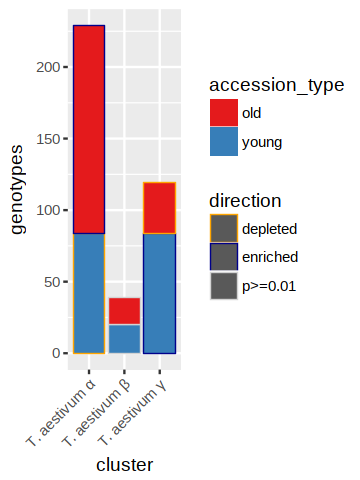

In [34]:
GROUP.t=melt(GROUP[,-c(4:8)],id.vars=c("cluster","significant"),value.name="genotypes",variable.name=target)
GROUP2.t=melt(GROUP2,id.vars=c("cluster"),value.name="direction",variable.name=target)
GROUP2.t[,target]=factor(gsub("\\.direction","",GROUP2.t[,target]))
GROUP.t=merge(GROUP.t,GROUP2.t,by=c("cluster",target))
mat=list("p>=0.01"="lightgrey","enriched"="darkblue","depleted"="orange","nonsense"="green")
GROUP.t$direction=factor(GROUP.t$direction)
col=unlist(mat[levels(droplevels(GROUP.t$direction))])
options(repr.plot.width=3, repr.plot.height=4)
g=ggplot(GROUP.t,aes_string(x="cluster",y="genotypes",fill=target,colour="direction")) + 
    scale_colour_manual(values=col)+
    geom_bar(stat="identity", position=position_stack(),size=.3) + 
    theme(axis.text.x = element_text(angle = 45, hjust = 1))+ 
    scale_fill_brewer(palette="Set1")
Cairo(type='pdf', file="test.TaxonCluster.accession_type_broad.flipped.pdf", width=3,height=4, units='in', bg='transparent')
print(g)
dev.off()

png 
  2

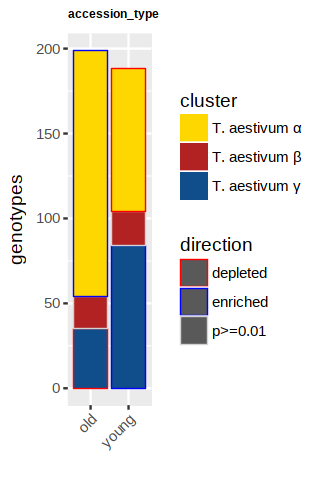

In [35]:
GROUP.t=melt(GROUP[,-c(4:8)],id.vars=c("cluster","significant"),value.name="genotypes",variable.name=target)
GROUP2.t=melt(GROUP2,id.vars=c("cluster"),value.name="direction",variable.name=target)
GROUP2.t[,target]=factor(gsub("\\.direction","",GROUP2.t[,target]))
GROUP.t=merge(GROUP.t,GROUP2.t,by=c("cluster",target))
mat=list("p>=0.01"="lightgrey","enriched"="blue","depleted"="red","nonsense"="green")
GROUP.t$direction=factor(GROUP.t$direction)
col=unlist(mat[levels(droplevels(GROUP.t$direction))])
options(repr.plot.width=2.7, repr.plot.height=4)
g=ggplot(GROUP.t,aes_string(x=target,y="genotypes",fill="cluster",colour="direction")) + 
    scale_colour_manual(values=col)+
    geom_bar(stat="identity", position=position_stack(),size=.3) + 
    ggtitle(gsub("\\."," ",target)) +
    xlab("")+
    theme(axis.text.x = element_text(angle = 45, hjust = 1),plot.title = element_text(size = 7, face = "bold"))+ 
    scale_fill_manual(values=c("gold","firebrick","dodgerblue4"))
Cairo(type='pdf', file="test.TaxonCluster.accession_type_broad.pdf", width=2.7,height=4, units='in', bg='transparent')
print(g)
dev.off()

## Vernalization

In [36]:
table(D$TaxonCluster,D$Growth.habit)

               
                Alternative Facultative na spring Spring Winter
  T. aestivum α           6           3 47      9     84     91
  T. aestivum β           0           0  3      1      8     29
  T. aestivum γ           0           4 32      0     16     95

In [37]:
select=c("Spring","spring","Winter")

In [38]:
Q=droplevels(subset(D, ! is.na(D$Growth.habit) & ! Growth.habit=="" & ! Growth.habit=="na" & Growth.habit %in% select))
Q$vernalization=ifelse(Q$Growth.habit =="Winter", "winter", "spring")
target="vernalization"

In [39]:
X=table(Q$TaxonCluster,Q[,target])
round(prop.table(X,1)*100,1)
chisq.test(X)
GROUP=do.call(rbind,lapply(1:nrow(X), function(i) {
    n=row.names(X)[i]
    q=chisq.test(X[n,],p=colSums(X[-i,])/sum(X[-i,]))
    q=data.frame(cluster=n,t(data.frame(X[i,])), t(data.frame(q$expected)), 
                 X.squared=q$statistic, df=q$parameter,p.value=q$p.value,significant=q$p.value<0.01)
    names(q)[4:5]=paste(names(q)[2:3],"expected",sep=".")
    row.names(q)=NULL
    q
}))
GROUP2=do.call(cbind.data.frame,lapply(2:3,function(i) {
    factor(ifelse(GROUP$significant,
                  ifelse(GROUP[,i]> GROUP[,i+2],
                         "enriched",ifelse(GROUP[,i]< GROUP[,i+2],
                                           "depleted","nonsense")),"p>=0.01"),
           levels=c("p>=0.01","enriched","depleted","nonsense"))
}))
GROUP2=data.frame(cluster=GROUP$cluster,GROUP2)
names(GROUP2)[2:3]=paste(names(GROUP)[2:3],"direction",sep=".")
GROUP
GROUP2

               
                spring winter
  T. aestivum α   50.5   49.5
  T. aestivum β   23.7   76.3
  T. aestivum γ   14.4   85.6


	Pearson's Chi-squared test

data:  X
X-squared = 42.089, df = 2, p-value = 7.251e-10


cluster,spring,winter,spring.expected,winter.expected,X.squared,df,p.value,significant
T. aestivum α,93,91,30.87248,153.12752,150.231502,1,1.542976e-34,TRUE
T. aestivum β,9,29,14.04068,23.95932,2.870112,1,9.023857e-02,FALSE
T. aestivum γ,16,95,51.00000,60.00000,44.436275,1,2.627728e-11,TRUE


cluster,spring.direction,winter.direction
T. aestivum α,enriched,depleted
T. aestivum β,p>=0.01,p>=0.01
T. aestivum γ,depleted,enriched


png 
  2

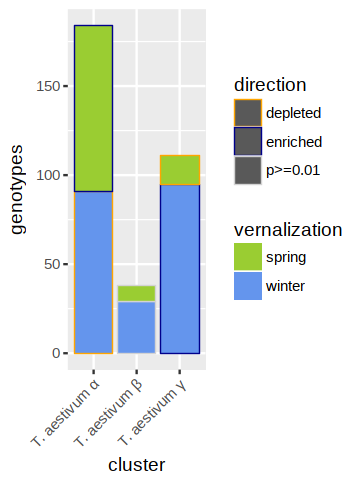

In [40]:
GROUP.t=melt(GROUP[,-c(4:8)],id.vars=c("cluster","significant"),value.name="genotypes",variable.name=target)
GROUP2.t=melt(GROUP2,id.vars=c("cluster"),value.name="direction",variable.name=target)
GROUP2.t[,target]=factor(gsub("\\.direction","",GROUP2.t[,target]))
GROUP.t=merge(GROUP.t,GROUP2.t,by=c("cluster",target))
mat=list("p>=0.01"="lightgrey","enriched"="darkblue","depleted"="orange","nonsense"="green")
GROUP.t$direction=factor(GROUP.t$direction)
col=unlist(mat[levels(droplevels(GROUP.t$direction))])
options(repr.plot.width=3, repr.plot.height=4)
g=ggplot(GROUP.t,aes_string(x="cluster",y="genotypes",fill=target,colour="direction")) + 
    scale_colour_manual(values=col)+
    geom_bar(stat="identity", position=position_stack(),size=.3) + 
    theme(axis.text.x = element_text(angle = 45, hjust = 1))+
    scale_fill_manual(values=c("olivedrab3","cornflowerblue"))
Cairo(type='pdf', file="test.TaxonCluster.vernalization.flipped.pdf", width=3,height=4, units='in', bg='transparent')
print(g)
dev.off()

png 
  2

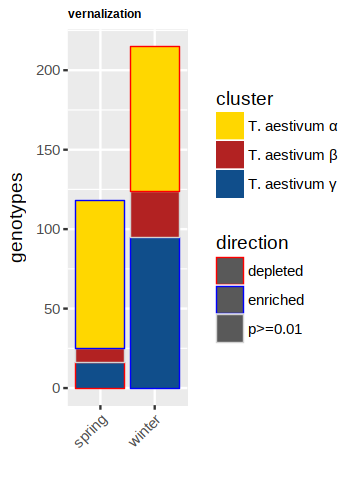

In [41]:
GROUP.t=melt(GROUP[,-c(4:8)],id.vars=c("cluster","significant"),value.name="genotypes",variable.name=target)
GROUP2.t=melt(GROUP2,id.vars=c("cluster"),value.name="direction",variable.name=target)
GROUP2.t[,target]=factor(gsub("\\.direction","",GROUP2.t[,target]))
GROUP.t=merge(GROUP.t,GROUP2.t,by=c("cluster",target))
mat=list("p>=0.01"="lightgrey","enriched"="blue","depleted"="red","nonsense"="green")
GROUP.t$direction=factor(GROUP.t$direction)
col=unlist(mat[levels(droplevels(GROUP.t$direction))])
options(repr.plot.width=3, repr.plot.height=4)
g=ggplot(GROUP.t,aes_string(x=target,y="genotypes",fill="cluster",colour="direction")) + 
    scale_colour_manual(values=col)+
    geom_bar(stat="identity", position=position_stack(),size=.3) + 
    ggtitle(gsub("\\."," ",target)) +
    xlab("")+
    theme(axis.text.x = element_text(angle = 45, hjust = 1),plot.title = element_text(size = 7, face = "bold"))+ 
    scale_fill_manual(values=c("gold","firebrick","dodgerblue4"))
Cairo(type='pdf', file="test.TaxonCluster.vernalization.pdf", width=2.7,height=4, units='in', bg='transparent')
print(g)
dev.off()

## Cultural and historic background

In [42]:
#export countries for manual assembly of next test groups
X=as.data.frame(table(continent=D$continent,country=D$Country.of.origin))
X=subset(X,Freq>0)
write.table(X,file="../countries.tsv",sep="\t",row.names=FALSE)

In [43]:
countries=read.xlsx("../countries.xlsx", 1)
head(countries)

continent,country,Freq,former.Warsaw.Pact.or.Iron.Curtain,Arab.world,former.western.bloc.and.aligned,central.europe,fertile_crescent
Asia,Afghanistan,5,FALSE,FALSE,FALSE,FALSE,FALSE
Europe,Albania,2,TRUE,FALSE,FALSE,FALSE,FALSE
Africa,Algeria,3,FALSE,TRUE,FALSE,FALSE,FALSE
America,Argentina,2,FALSE,FALSE,FALSE,FALSE,FALSE
Asia,Armenia,3,TRUE,FALSE,FALSE,FALSE,FALSE
Oceania,Australia,3,FALSE,FALSE,TRUE,FALSE,FALSE


In [44]:
nrow(D)
DD=merge(D,countries,by.y=c("continent","country"),by.x=c("continent","Country.of.origin"))
nrow(DD)
head(DD)

[1] 428

[1] 427

continent,Country.of.origin,id,SUID,X__glayCluster,Acession.number,Altitude,any.other.important.information,any.other.important.information.1,any.other.important.information.2,⋯,Wax,wordcloud.sync,Year.listed...recommended...Acquisition.year...released...collected,code,Freq,former.Warsaw.Pact.or.Iron.Curtain,Arab.world,former.western.bloc.and.aligned,central.europe,fertile_crescent
Africa,Algeria,WW-325,307,2,1177,NA,,,,⋯,,false,1924,DZA,3,FALSE,TRUE,FALSE,FALSE,FALSE
Africa,Algeria,WW-420,291,2,6843,NA,,,,⋯,,false,na,DZA,3,FALSE,TRUE,FALSE,FALSE,FALSE
Africa,Algeria,WW-510,287,2,WC742,NA,Algeria 35,V11,,⋯,*,false,na,DZA,3,FALSE,TRUE,FALSE,FALSE,FALSE
Africa,Egypt,WW-312,497,2,514,NA,,,,⋯,,false,na,EGY,2,FALSE,TRUE,FALSE,FALSE,TRUE
Africa,Egypt,WW-085,249,2,TRI 4989,NA,,,SSD,⋯,,false,1961,EGY,2,FALSE,TRUE,FALSE,FALSE,TRUE
Africa,Ethiopia,WW-456,373,2,23923,NA,,,,⋯,,false,1927,ETH,1,FALSE,FALSE,FALSE,FALSE,FALSE


In [45]:
targets=names(countries)[-c(1:3)]

In [46]:
analyse_target=function(target) { 
    display_markdown(paste("### Testing",sprintf("'%s'",gsub("\\."," ",target))))
    Q=subset(DD, ! is.na(DD[,target]) & ! DD[,target]=="" & ! DD[,target]=="na" & ! DD[,target]=="NA")
    X=table(cluster=Q$TaxonCluster,target=Q[,target])
    display(X)
    round(prop.table(X,1)*100,1)
    display(suppressWarnings(chisq.test(X)))
    TYPE=do.call(rbind,lapply(1:nrow(X), function(i) {
        n=row.names(X)[i]
        q=suppressWarnings(chisq.test(X[n,],p=colSums(X[-i,])/sum(X[-i,])))
        q=data.frame(cluster=n,t(data.frame(X[i,])), t(data.frame(q$expected)), 
                     X.squared=q$statistic, df=q$parameter,p.value=q$p.value,
                     significant=q$p.value<0.01)
        names(q)[4:5]=paste(names(q)[2:3],"expected",sep=".")
        row.names(q)=NULL
        names(q)=gsub("\\.$","",names(q))
        names(q)=gsub("\\.\\.",".",names(q))
        q
    }))
    TYPE2=do.call(cbind.data.frame,lapply(2:3,function(i) {
        factor(ifelse(TYPE$significant,
                  ifelse(TYPE[,i]> TYPE[,i+2],
                         "enriched",ifelse(TYPE[,i]< TYPE[,i+2],
                                           "depleted","nonsense")),"p>=0.01"),
           levels=c("p>=0.01","enriched","depleted","nonsense"))
    }))
    TYPE2=data.frame(cluster=TYPE$cluster,TYPE2)
    names(TYPE2)[2:3]=paste(names(TYPE)[2:3],"direction",sep=".")
    #TYPE$direction=ifelse(TYPE$significant, ifelse(TYPE$TRUE.expected<TYPE[,"TRUE"],"enriched",
    #                                               ifelse(TYPE$FALSE.expected<TYPE[,"FALSE"],
    #                                                      "depleted","nonsense")),"p>=0.01")
    #TYPE$direction=factor(TYPE$direction,levels=c("p>=0.01","enriched","depleted","nonsense"))

    TYPE.t=melt(TYPE[,-c(4:8)],id.vars=c("cluster","significant"),value.name="genotypes",variable.name=target)
    TYPE2.t=melt(TYPE2,id.vars=c("cluster"),value.name="direction",variable.name=target)
    TYPE2.t[,target]=factor(gsub("\\.direction","",TYPE2.t[,target]))
    TYPE.t=merge(TYPE.t,TYPE2.t,by=c("cluster",target))
    mat=list("p>=0.01"="lightgrey","enriched"="darkblue","depleted"="orange","nonsense"="green")
    TYPE.t$direction=factor(TYPE.t$direction) 
    
    col=unlist(mat[levels(droplevels(TYPE.t$direction))])
    
    display(TYPE)
    display(TYPE2)
    
    g=ggplot(TYPE.t,aes_string(x="cluster",y="genotypes",fill=target,colour="direction")) + 
        geom_bar(stat="identity", position=position_stack(),size=.3) + 
        scale_colour_manual(values=col)+
        scale_fill_brewer(palette="Set1")+
        ggtitle(gsub("\\."," ",target))+ 
        guides(fill=guide_legend(title="category")) +
        theme(axis.text.x = element_text(angle = 45, hjust = 1,size=9), 
              legend.text = element_text(size = 7, hjust = 0, vjust = 1),
              legend.title = element_text(size = 10),
              plot.title = element_text(size = 7, face = "bold"))

    display(g)
    Cairo(type='pdf', file=sprintf("test.TaxonCluster.%s.flipped.pdf",target), width=2.7,height=4, units='in', bg='transparent')
    print(g)
    dev.off()
    
}

In [47]:
analyse_target2=function(target) { 
    Q=subset(DD, ! is.na(DD[,target]) & ! DD[,target]=="" & ! DD[,target]=="na" & ! DD[,target]=="NA")
    X=table(cluster=Q$TaxonCluster,target=Q[,target])
    round(prop.table(X,1)*100,1)
    TYPE=do.call(rbind,lapply(1:nrow(X), function(i) {
        n=row.names(X)[i]
        q=suppressWarnings(chisq.test(X[n,],p=colSums(X[-i,])/sum(X[-i,])))
        q=data.frame(cluster=n,t(data.frame(X[i,])), t(data.frame(q$expected)), 
                     X.squared=q$statistic, df=q$parameter,p.value=q$p.value,
                     significant=q$p.value<0.01)
        names(q)[4:5]=paste(names(q)[2:3],"expected",sep=".")
        row.names(q)=NULL
        names(q)=gsub("\\.$","",names(q))
        names(q)=gsub("\\.\\.",".",names(q))
        q
    }))
    TYPE2=do.call(cbind.data.frame,lapply(2:3,function(i) {
        factor(ifelse(TYPE$significant,
                  ifelse(TYPE[,i]> TYPE[,i+2],
                         "enriched",ifelse(TYPE[,i]< TYPE[,i+2],
                                           "depleted","nonsense")),"p>=0.01"),
           levels=c("p>=0.01","enriched","depleted","nonsense"))
    }))
    TYPE2=data.frame(cluster=TYPE$cluster,TYPE2)
    names(TYPE2)[2:3]=paste(names(TYPE)[2:3],"direction",sep=".")
    #TYPE$direction=ifelse(TYPE$significant, ifelse(TYPE$TRUE.expected<TYPE[,"TRUE"],"enriched",
    #                                               ifelse(TYPE$FALSE.expected<TYPE[,"FALSE"],
    #                                                      "depleted","nonsense")),"p>=0.01")
    #TYPE$direction=factor(TYPE$direction,levels=c("p>=0.01","enriched","depleted","nonsense"))

    TYPE.t=melt(TYPE[,-c(4:8)],id.vars=c("cluster","significant"),value.name="genotypes",variable.name=target)
    TYPE2.t=melt(TYPE2,id.vars=c("cluster"),value.name="direction",variable.name=target)
    TYPE2.t[,target]=factor(gsub("\\.direction","",TYPE2.t[,target]))
    TYPE.t=merge(TYPE.t,TYPE2.t,by=c("cluster",target))
    mat=list("p>=0.01"="lightgrey","enriched"="blue","depleted"="red","nonsense"="green")
    TYPE.t$direction=factor(TYPE.t$direction) 
    
    col=unlist(mat[levels(droplevels(TYPE.t$direction))])
    
    
    g=ggplot(TYPE.t,aes_string(x=target,y="genotypes",fill="cluster",colour="direction")) + 
        geom_bar(stat="identity", position=position_stack(),size=.3) + 
        scale_colour_manual(values=col)+
        scale_fill_manual(values=c("gold","firebrick","dodgerblue4"))+
        ggtitle(gsub("\\."," ",target))+ 
        xlab("")+
     #   guides(fill=guide_legend(title="category")) +
        theme(axis.text.x = element_text(angle = 45, hjust = 1,size=9), 
      #        legend.text = element_text(size = 7, hjust = 0, vjust = 1),
       #       legend.title = element_text(size = 10),
              plot.title = element_text(size = 7, face = "bold"))

    display(g)
    Cairo(type='pdf', file=sprintf("test.TaxonCluster.%s.pdf",target), width=2.7,height=4, units='in', bg='transparent')
    print(g)
    dev.off()
    
}

### Testing 'former Warsaw Pact or Iron Curtain'

               target
cluster         FALSE TRUE
  T. aestivum α   186   53
  T. aestivum β    19   22
  T. aestivum γ   130   17


	Pearson's Chi-squared test

data:  X
X-squared = 33.733, df = 2, p-value = 4.732e-08


cluster,FALSE,TRUE,FALSE.expected,TRUE.expected,X.squared,df,p.value,significant
T. aestivum α,186,53,189.42021,49.579787,0.2976961,1,5.853304e-01,FALSE
T. aestivum β,19,22,33.56477,7.435233,34.8507961,1,3.559640e-09,TRUE
T. aestivum γ,130,17,107.62500,39.375000,17.3663957,1,3.082277e-05,TRUE


cluster,FALSE.direction,TRUE.direction
T. aestivum α,p>=0.01,p>=0.01
T. aestivum β,depleted,enriched
T. aestivum γ,enriched,depleted


png 
  2

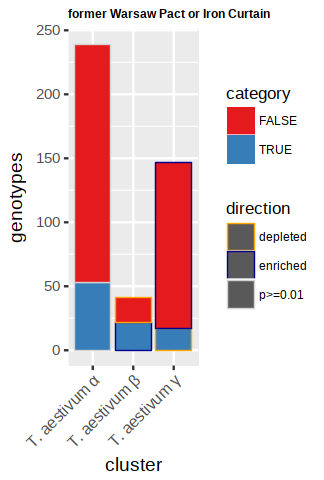

png 
  2

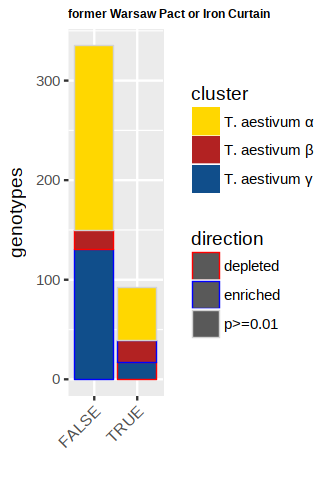

In [48]:
i=1
options(repr.plot.width=2.7, repr.plot.height=4)
analyse_target(targets[i])
analyse_target2(targets[i])

### Testing 'Arab world'

               target
cluster         FALSE TRUE
  T. aestivum α   226   13
  T. aestivum β    41    0
  T. aestivum γ   145    2


	Pearson's Chi-squared test

data:  X
X-squared = 6.1187, df = 2, p-value = 0.04692


cluster,FALSE,TRUE,FALSE.expected,TRUE.expected,X.squared,df,p.value,significant
T. aestivum α,226,13,236.45745,2.542553,43.473658,1,4.297050e-11,TRUE
T. aestivum β,41,0,39.40674,1.593264,1.657682,1,1.979166e-01,FALSE
T. aestivum γ,145,2,140.17500,6.825000,3.577163,1,5.857911e-02,FALSE


cluster,FALSE.direction,TRUE.direction
T. aestivum α,depleted,enriched
T. aestivum β,p>=0.01,p>=0.01
T. aestivum γ,p>=0.01,p>=0.01


png 
  2

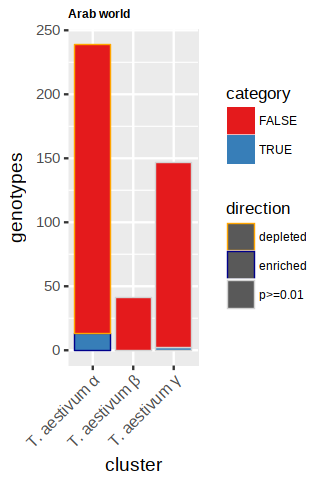

png 
  2

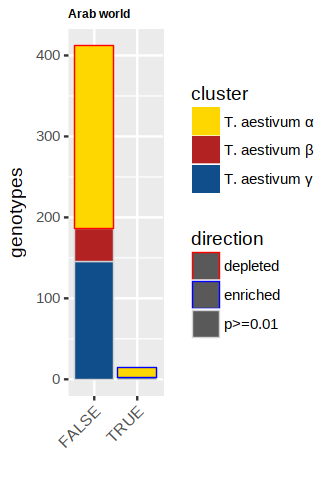

In [49]:
i=2
options(repr.plot.width=2.7, repr.plot.height=4)
analyse_target(targets[i])
analyse_target2(targets[i])

### Testing 'former western bloc and aligned'

               target
cluster         FALSE TRUE
  T. aestivum α   152   87
  T. aestivum β    24   17
  T. aestivum γ    27  120


	Pearson's Chi-squared test

data:  X
X-squared = 76.863, df = 2, p-value < 2.2e-16


cluster,FALSE,TRUE,FALSE.expected,TRUE.expected,X.squared,df,p.value,significant
T. aestivum α,152,87,64.83511,174.16489,160.808967,1,7.531846e-37,TRUE
T. aestivum β,24,17,19.01295,21.98705,2.439238,1,1.183337e-01,FALSE
T. aestivum γ,27,120,92.40000,54.60000,124.625874,1,6.145451e-29,TRUE


cluster,FALSE.direction,TRUE.direction
T. aestivum α,enriched,depleted
T. aestivum β,p>=0.01,p>=0.01
T. aestivum γ,depleted,enriched


png 
  2

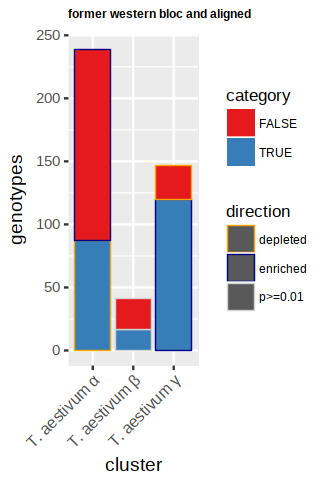

png 
  2

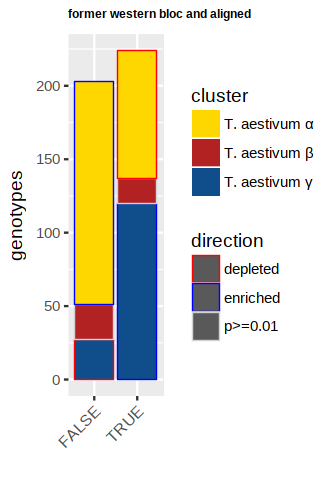

In [50]:
i=3
options(repr.plot.width=2.7, repr.plot.height=4)

analyse_target(targets[i])
analyse_target2(targets[i])

### Testing 'central europe'

               target
cluster         FALSE TRUE
  T. aestivum α   205   34
  T. aestivum β    23   18
  T. aestivum γ    88   59


	Pearson's Chi-squared test

data:  X
X-squared = 39.322, df = 2, p-value = 2.892e-09


cluster,FALSE,TRUE,FALSE.expected,TRUE.expected,X.squared,df,p.value,significant
T. aestivum α,205,34,141.11170,97.888298,70.623092,1,4.324257e-17,TRUE
T. aestivum β,23,18,31.12176,9.878238,8.797123,1,3.017059e-03,TRUE
T. aestivum γ,88,59,119.70000,27.300000,45.204229,1,1.775214e-11,TRUE


cluster,FALSE.direction,TRUE.direction
T. aestivum α,enriched,depleted
T. aestivum β,depleted,enriched
T. aestivum γ,depleted,enriched


png 
  2

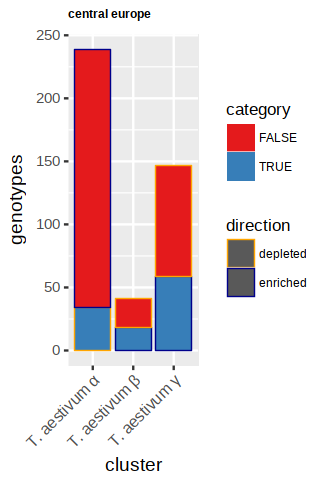

png 
  2

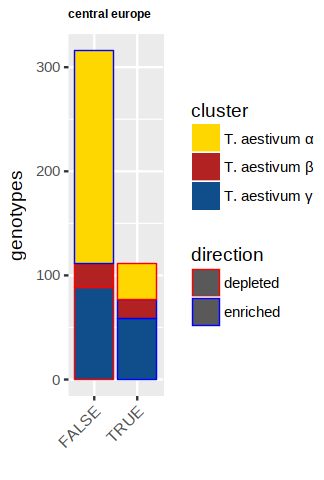

In [51]:
i=4
options(repr.plot.width=2.7, repr.plot.height=4)
analyse_target(targets[i])
analyse_target2(targets[i])

### Testing 'fertile_crescent'

               target
cluster         FALSE TRUE
  T. aestivum α   197   42
  T. aestivum β    38    3
  T. aestivum γ   146    1


	Pearson's Chi-squared test

data:  X
X-squared = 27.585, df = 2, p-value = 1.023e-06


cluster,FALSE,TRUE,FALSE.expected,TRUE.expected,X.squared,df,p.value,significant
T. aestivum α,197,42,233.91489,5.085106,273.8061670,1,1.680323e-61,TRUE
T. aestivum β,38,3,36.43264,4.567358,0.6052911,1,4.365663e-01,FALSE
T. aestivum γ,146,1,123.37500,23.625000,25.8163909,1,3.754862e-07,TRUE


cluster,FALSE.direction,TRUE.direction
T. aestivum α,depleted,enriched
T. aestivum β,p>=0.01,p>=0.01
T. aestivum γ,enriched,depleted


png 
  2

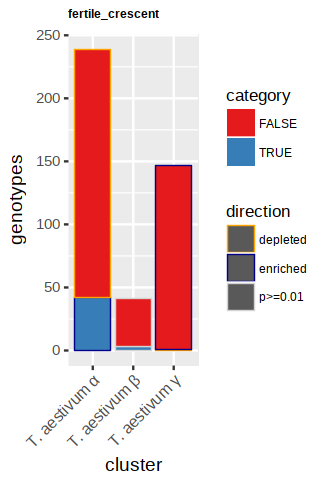

png 
  2

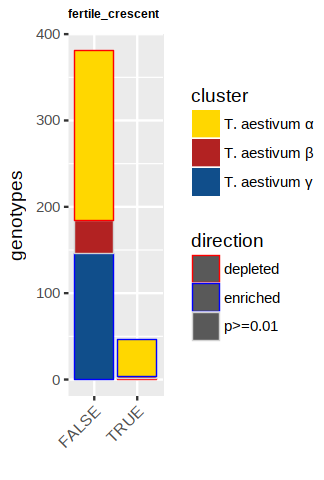

In [52]:
i=5
options(repr.plot.width=2.7, repr.plot.height=4)
analyse_target(targets[i])
analyse_target2(targets[i])

In [53]:
Q=droplevels(subset(DD,TaxonCluster=="T. aestivum β"))
table(Q$group,Q$Country.of.origin)

     
      Armenia Belgium Bulgaria Croatia Czechia Finland Germany Hungary na
  I         1       0        0       0       1       0       0       0  0
  II        0       2        0       0       0       1       3       0  1
  III       0       0        3       1       1       0       0       1  0
  IV        0       0        0       0       0       0       0       6  0
     
      Portugal Russian Federation SUN Sweden Switzerland Turkey Ukraine
  I          2                  0   0      0           2      1       0
  II         0                  1   0      2           0      0       0
  III        0                  3   1      0           0      0       1
  IV         0                  0   0      0           0      2       1
     
      United Kingdom USA YUG
  I                1   1   0
  II               0   0   0
  III              0   1   1
  IV               0   0   0

In [54]:
table(Q$Country.of.origin,Q$Year.listed...recommended...Acquisition.year...released...collected,Q$former.Warsaw.Pact.or.Iron.Curtain)

, ,  = FALSE

                    
                     <1933 1850 1899 1919 1929 1930 1936 1946 1953 1954 1966
  Armenia                0    0    0    0    0    0    0    0    0    0    0
  Belgium                0    0    0    0    0    0    1    0    0    1    0
  Bulgaria               0    0    0    0    0    0    0    0    0    0    0
  Croatia                0    0    0    0    0    0    0    0    0    0    0
  Czechia                0    0    0    0    0    0    0    0    0    0    0
  Finland                0    0    0    0    0    0    0    0    1    0    0
  Germany                0    0    0    0    0    0    0    2    0    0    0
  Hungary                0    0    0    0    0    0    0    0    0    0    0
  na                     0    0    0    0    0    0    0    1    0    0    0
  Portugal               2    0    0    0    0    0    0    0    0    0    0
  Russian Federation     0    0    0    0    0    0    0    0    0    0    0
  SUN                    0    0    0    0

In [58]:
table(D$Country.of.origin,D$TaxonCluster,D$group, D$Biological.status)

, ,  = ,  = breeding line

                      
                       T. aestivum α T. aestivum β T. aestivum γ
  Afghanistan                      0             0             0
  Albania                          0             0             0
  Algeria                          0             0             0
  Argentina                        0             0             0
  Armenia                          0             0             0
  Australia                        0             0             0
  Austria                          0             0             0
  Azerbaijan                       0             0             0
  Belgium                          0             0             0
  Brazil                           0             0             0
  Bulgaria                         0             0             0
  Canada                           0             0             0
  China                            0             0             0
  Colombia                         0    

# Edges

In [61]:
e=read.delim("Consensus_network.1000_RAxML.all_genomes.tsv",sep="\t")
nrow(e)
head(e)

[1] 35613

x,y,support,genome,mst
WW-451,WW-007,0.985,A,True
WW-451,WW-156,0.782,A,True
WW-451,WW-149,0.010,A,False
WW-451,WW-013,0.001,A,False
WW-451,WW-044,0.002,A,False
WW-451,WW-322,0.001,A,False


In [70]:
E=merge(merge(e,D[,c(1,2,5,60,69)],by.x="x",by.y="id"),D[,c(1,2,5,60,69)],by.x="y",by.y="id")
head(E)

y,x,support,genome,mst,continent.x,X__glayCluster.x,TaxonCluster.x,code.x,continent.y,X__glayCluster.y,TaxonCluster.y,code.y
WW-001,WW-013,0.007,D,False,Europe,3,T. aestivum γ,DEU,Europe,3,T. aestivum γ,FRA
WW-001,WW-012,0.001,B,False,Europe,3,T. aestivum γ,DEU,Europe,3,T. aestivum γ,FRA
WW-001,WW-004,0.001,D,False,Europe,3,T. aestivum γ,FRA,Europe,3,T. aestivum γ,FRA
WW-001,WW-299,0.001,D,False,Asia,2,T. aestivum α,ISR,Europe,3,T. aestivum γ,FRA
WW-001,WW-053,0.006,D,False,Europe,3,T. aestivum γ,GBR,Europe,3,T. aestivum γ,FRA
WW-001,WW-015,0.061,A,False,Europe,3,T. aestivum γ,DEU,Europe,3,T. aestivum γ,FRA


In [71]:
E$interaction_type=ifelse(as.character(E$TaxonCluster.x)==as.character(E$TaxonCluster.y),"intra","inter")
table(E$interaction_type)


inter intra 
10688 23930 

In [113]:
Xb=c("T. aestivum β","T. aestivum α")
Xg=c("T. aestivum γ","T. aestivum α")
Xk=c("T. aestivum β","T. aestivum γ")
X=c(nrow(subset(E,interaction_type=="inter" & TaxonCluster.x %in% Xb & TaxonCluster.y %in% Xb)),
         nrow(subset(E,interaction_type=="inter" & TaxonCluster.x %in% Xk & TaxonCluster.y %in% Xk))
        )
display_markdown("### T. aestivum β")
display(sprintf("%i with α and %i among others",X[1],X[2]))
X=chisq.test(X,p=rep(0.5,2))
display(X)

X=c(nrow(subset(E,interaction_type=="inter" & TaxonCluster.x %in% Xg & TaxonCluster.y %in% Xg)),
         nrow(subset(E,interaction_type=="inter" & TaxonCluster.x %in% Xk & TaxonCluster.y %in% Xk))
        )
display_markdown("### T. aestivum γ")
display(sprintf("%i with α and %i among others",X[1],X[2]))
X=chisq.test(X,p=rep(0.5,2))
display(X)


X=c(nrow(subset(E,interaction_type=="inter" & TaxonCluster.x %in% Xb & TaxonCluster.y %in% Xb)),
    nrow(subset(E,interaction_type=="inter" & TaxonCluster.x %in% Xg & TaxonCluster.y %in% Xg)),
         nrow(subset(E,interaction_type=="inter" & TaxonCluster.x %in% Xk & TaxonCluster.y %in% Xk))
        )
display_markdown("### all three")
display(sprintf("%i and %i with α and %i among each other",X[1],X[2], X[3]))
X=chisq.test(X,p=rep(1/3,3))
display(X)

### T. aestivum β

[1] "2511 with α and 1554 among others"


	Chi-squared test for given probabilities

data:  X
X-squared = 225.3, df = 1, p-value < 2.2e-16


### T. aestivum γ

[1] "6623 with α and 1554 among others"


	Chi-squared test for given probabilities

data:  X
X-squared = 3142.3, df = 1, p-value < 2.2e-16


### all three

[1] "2511 and 6623 with α and 1554 among each other"


	Chi-squared test for given probabilities

data:  X
X-squared = 4071.8, df = 2, p-value < 2.2e-16
